In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
covid=pd.read_csv("C:/Users/vineela/Desktop/IBM/DSData-master/aggregate_covid_country.csv",parse_dates=['Date'])

In [4]:
covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
covid.keys()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [6]:
covid.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
covid.shape

(23688, 5)

In [8]:
covid.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [52]:
covid.isnull().sum()

Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [53]:
covid.corr()

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


In [54]:
covid.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


In [55]:
covid.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

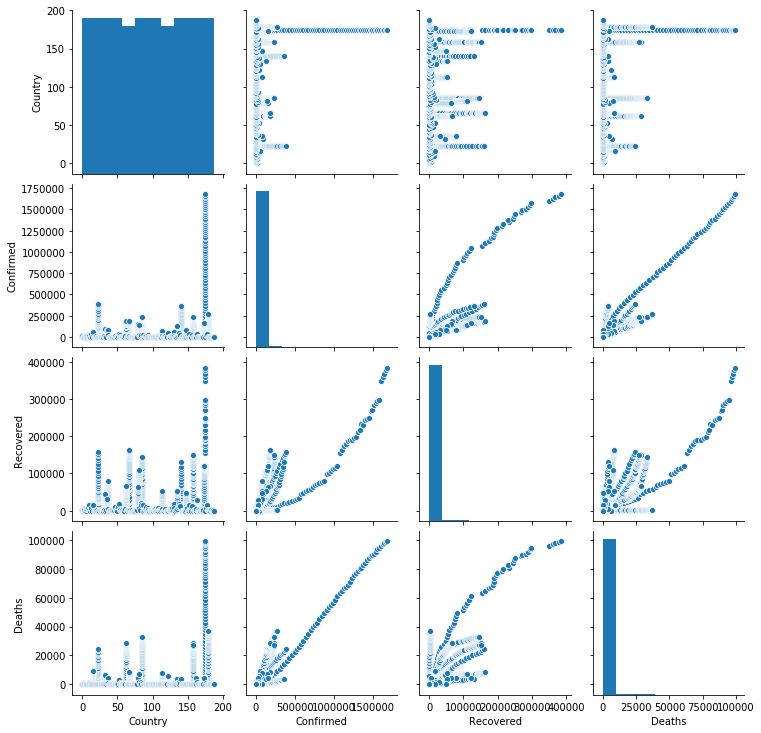

In [56]:
sns.pairplot(covid)

Country         AxesSubplot(0.125,0.125;0.133621x0.755)
Confirmed    AxesSubplot(0.285345,0.125;0.133621x0.755)
Recovered     AxesSubplot(0.44569,0.125;0.133621x0.755)
Deaths       AxesSubplot(0.606034,0.125;0.133621x0.755)
dtype: object

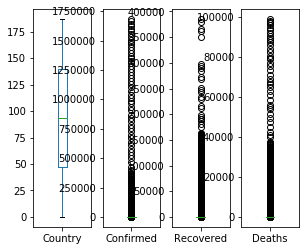

In [57]:
covid.plot(kind='box',subplots=True,layout=(1,5))

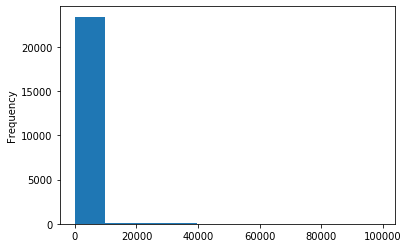

In [58]:
covid['Deaths'].plot.hist()

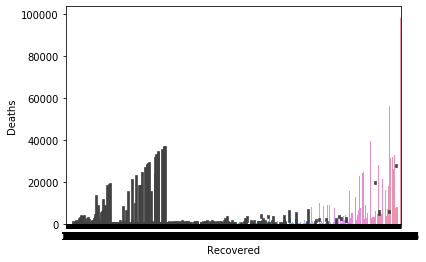

In [60]:
sns.barplot(x='Recovered',y='Deaths',data=covid)
plt.show()

In [61]:
covid.nunique()

Country       188
Confirmed    5308
Recovered    3303
Deaths       1768
dtype: int64

In [9]:
df_dates=pd.DataFrame()
df_dates['month']=covid['Date'].dt.month_name()
df_dates['year']=covid['Date'].dt.year
df_dates['day']=covid['Date'].dt.day_name()
df_dates['Deaths']=covid['Deaths']
df_dates

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


In [ ]:
df_dates['year'].drop_duplicates()

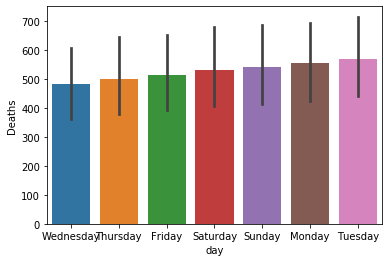

In [62]:
sns.barplot(x='day',y='Deaths',data=df_dates)
plt.show()

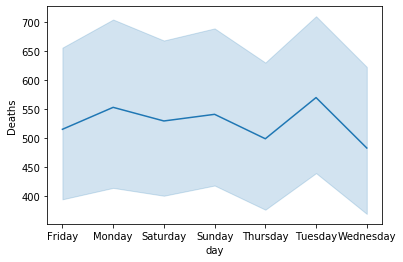

In [63]:
sns.lineplot(x='day',y='Deaths',data=df_dates)
plt.show()

In [65]:
covid.dtypes

Country      int32
Confirmed    int64
Recovered    int64
Deaths       int64
dtype: object

In [68]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values
covid['Country'] = labelencoder.fit_transform(covid['Country'])
covid

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [69]:
from scipy.stats import zscore
z=abs(zscore(covid))
covid_new=covid[(z<3).all(axis=1)]
print(covid.shape,covid_new.shape)

(23688, 4) (23177, 4)


In [70]:
covid_new

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [71]:
# input and output variable
x=covid_new.iloc[:,0:-1]
y=covid_new['Deaths']

In [24]:
x.shape

(23177, 3)

In [25]:
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

In [72]:
y.shape

(23177,)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc=scaler.fit_transform(x,y)


In [74]:
x

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
23683,183,429,365
23684,184,9,6
23685,185,249,10
23686,186,920,336


In [75]:
x.skew()

Country     -0.005144
Confirmed    6.906829
Recovered    7.472281
dtype: float64

In [76]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [77]:
print(x_train.shape,x_test.shape)

(16223, 3) (6954, 3)


In [78]:
print(y_train.shape,y_test.shape)

(16223,) (6954,)


In [38]:
x_train

,Country,Confirmed,Recovered
4837,137,0,0
16868,136,9593,1133
12943,159,122,15
944,4,0,0
8147,63,0,0
...,...,...,...
9990,26,3,0
23048,112,332,322
501,125,0,0
23676,176,21584,7575


In [79]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [80]:
lm.coef_

array([-0.33813867,  0.05270817, -0.00579673])

In [81]:
lm.intercept_

20.261996755697126

In [82]:
lm.score(x_train,y_train)

0.563733699153101

In [83]:
#predict the value
pred=lm.predict(x_test)
print("predicted result:",pred)
print("actual result:",y_test)

predicted result: [-12.82288461   4.12303654  11.1322527  ... -35.86902225  17.89502607
  19.92385809]
actual result: 22094    0
19226    0
403      0
8893     0
1238     0
        ..
9892     0
8373     0
17650    0
6775     0
7145     0
Name: Deaths, Length: 6954, dtype: int64


In [90]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("error:")

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))

print("Mean Mean Squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 89.89172702923236
Mean squared error: 151123.2842572742
Mean Mean Squared error: 388.7457835877763


In [91]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6093546984386548


In [92]:
import joblib
joblib.dump(lm,'covid.pkl')

['covid.pkl']